<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Mall_customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-6-dbeb3ebee0aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender',palette='pastel')


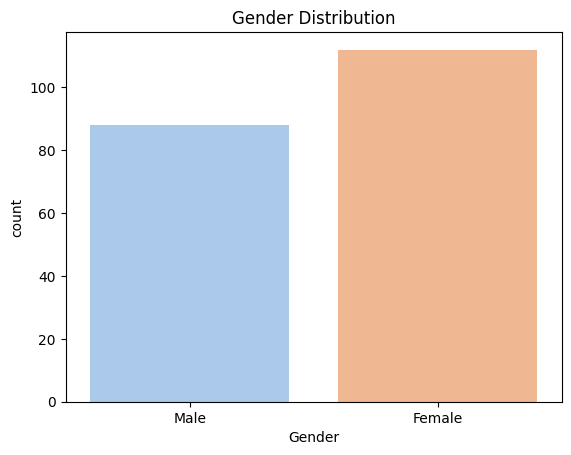

In [6]:
#Understand Customer Behavior
sns.countplot(data=df, x='Gender',palette='pastel')
plt.title('Gender Distribution')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtitle'

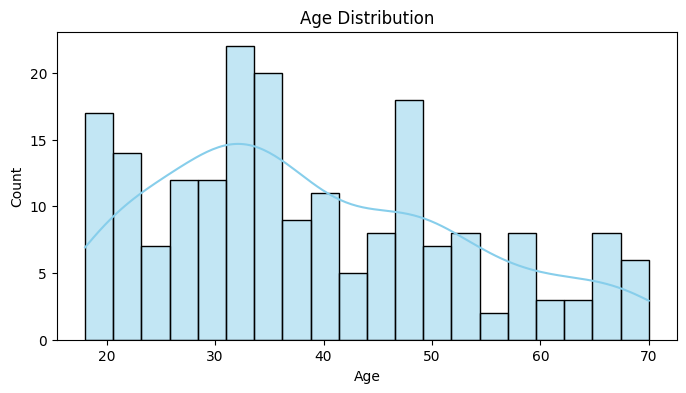

In [7]:
#Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],bins=20,kde=True,color='skyblue')
plt.title('Age Distribution')
plt.xtitle('Age')
plt.ytitle('Count')
plt.show()

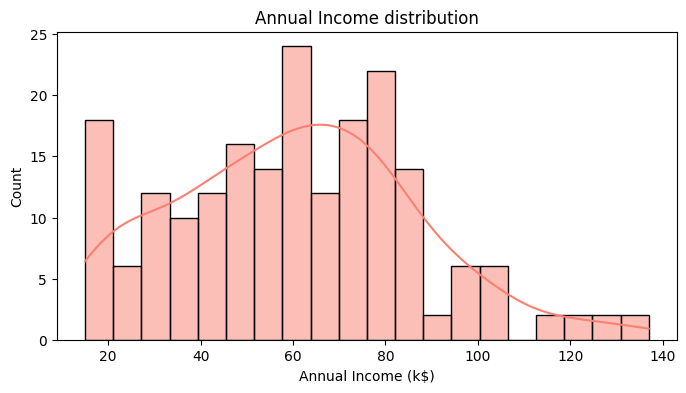

In [8]:
#Annual Income Distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='salmon')
plt.title('Annual Income distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

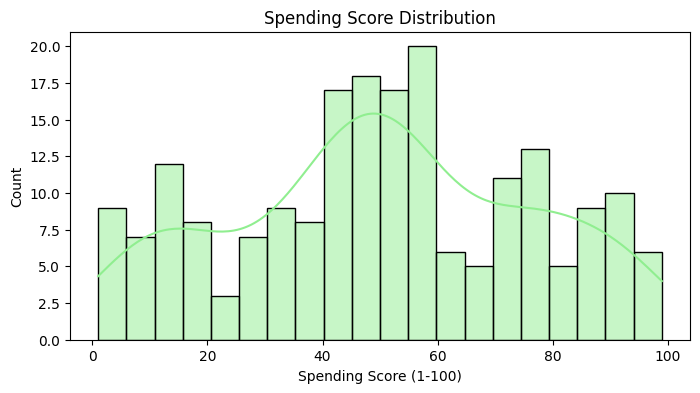

In [9]:
#D. Spending Score Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

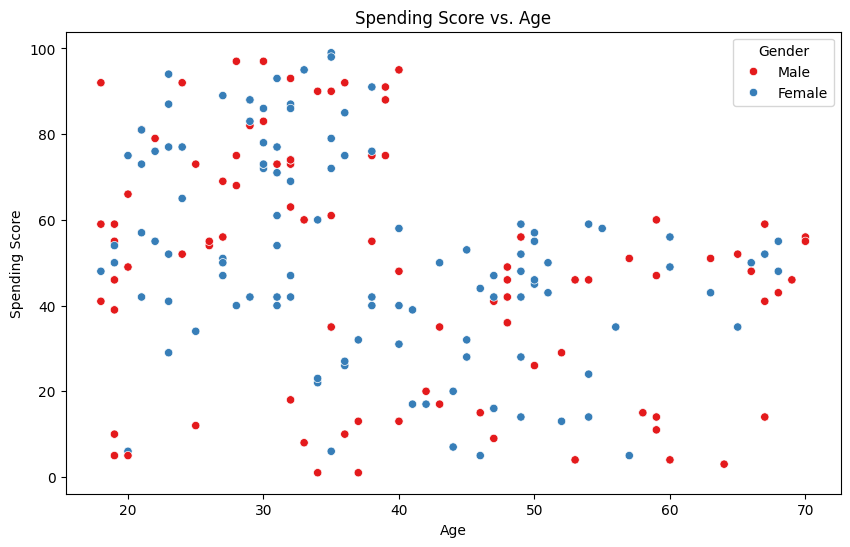

In [13]:
# Step 3: Bivariate Analysis
 #Spending Score vs. Age
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender',palette='Set1')
plt.title('Spending Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


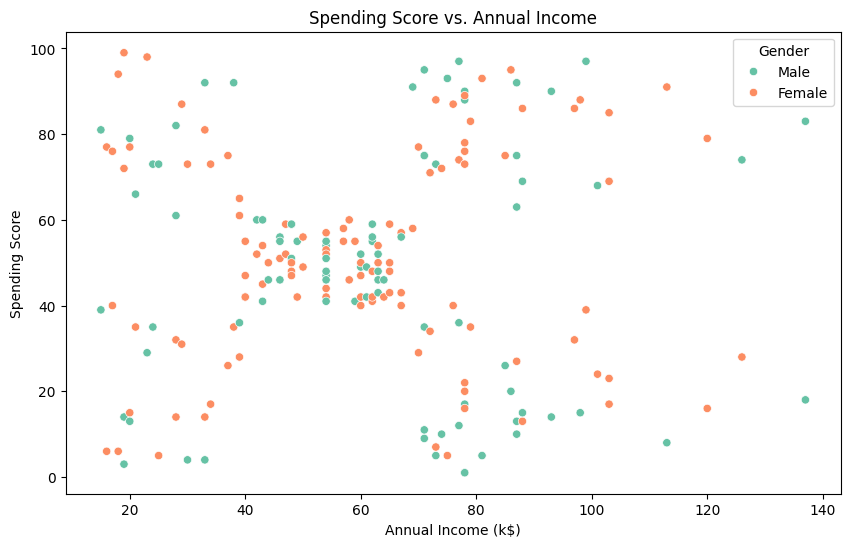

In [14]:
#B. Spending Score vs. Annual Income
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',palette='Set2')
plt.title('Spending Score vs. Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

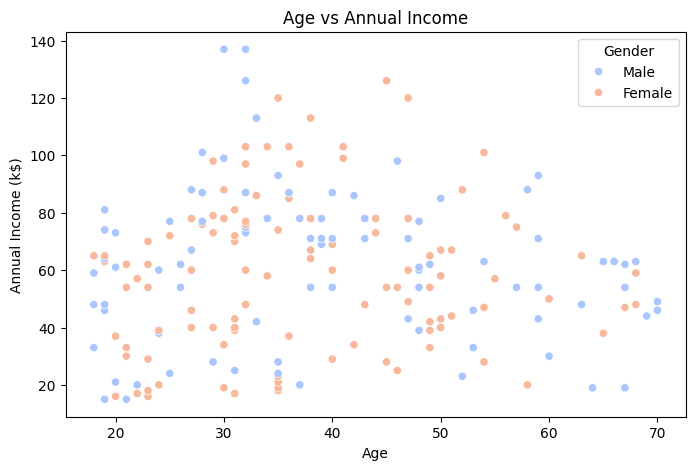

In [15]:
# Annual Income vs. Age
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', palette='coolwarm')
plt.title('Age vs Annual Income')
plt.show()

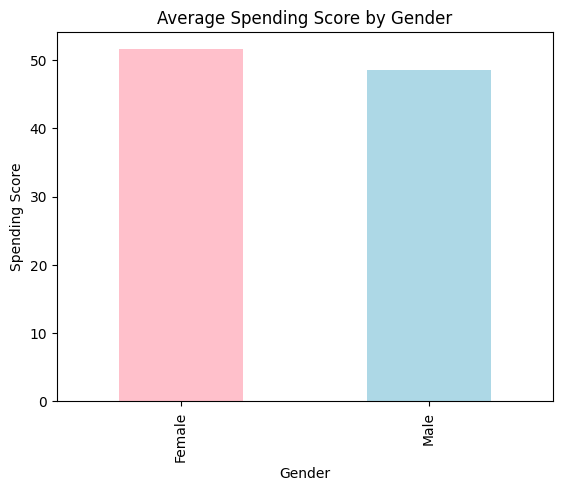

In [16]:
#Average
df.groupby('Gender')['Spending Score (1-100)'].mean().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Average Spending Score by Gender')
plt.ylabel('Spending Score')
plt.show()


In [17]:
#B. Income and Age Binning
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 70],
                         labels=['16-25', '26-35', '36-45', '46-55', '56-70'])

# Create income groups
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=[0, 30, 60, 90, 120],
                            labels=['Low', 'Medium', 'High', 'Very High'])


<ipython-input-18-9ae514431dcb>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Spending Score (1-100)',


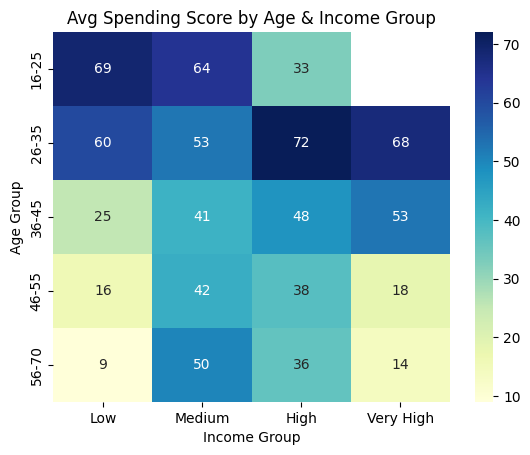

In [18]:
pivot = df.pivot_table(values='Spending Score (1-100)',
                       index='Age Group', columns='Income Group', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Avg Spending Score by Age & Income Group')
plt.show()


In [19]:
df.groupby(['Gender', 'Age Group'])['Spending Score (1-100)'].mean().unstack().style.background_gradient(cmap='coolwarm')


<ipython-input-19-6bb5724e74b7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender', 'Age Group'])['Spending Score (1-100)'].mean().unstack().style.background_gradient(cmap='coolwarm')


Age Group,16-25,26-35,36-45,46-55,56-70
Gender,,,,,
Female,58.650000,64.648649,42.190476,38.130435,40.272727
Male,50.833333,64.130435,48.533333,34.357143,37.222222
